# Comparsion Of Denoising Algorithms
---

Step 1: Import the required library for image processing

In [1]:
from skimage import data, img_as_float, measure
from skimage.restoration import denoise_bilateral, denoise_tv_chambolle, denoise_wavelet, estimate_sigma
from skimage.util import random_noise
from skimage.metrics import structural_similarity as ssim
from skimage.metrics import peak_signal_noise_ratio

import imutils
import cv2
import matplotlib.pyplot as plt
import numpy as np
import time
import pandas as pd

Step 2: Define functions

In [2]:
def add_noise(img, mode):
    noise_img = random_noise(img, mode=mode)
    noise_img = np.array(255*noise_img, dtype = 'uint8')
    return noise_img

def add_sp_noise(img):
    return add_noise(img, "s&p")

def add_shot_noise(img):
    return add_noise(img, "poisson")

def get_measurement(original, to_compare):
#     mse = measure.compare_mse(original, to_compare)
    #psnr = measure.compare_psnr(noisy, to_compare)
    psnr = peak_signal_noise_ratio(original, to_compare)
    (ssim_score, diff) = ssim(original, to_compare, multichannel=True, full=True)
    return round(psnr, 2), round(ssim_score, 2)

def denoise_img(noise_img, mode):
    start_time = time.time()
    if mode == 'TV':
        noise_img = img_as_float(noise_img, False)
        denoised_img = denoise_tv_chambolle(noise_img, weight=0.1, multichannel=True)
    elif mode == 'BI':
        noise_img = img_as_float(noise_img, False)
        denoised_img = denoise_bilateral(noise_img, sigma_color=0.05, sigma_spatial=15, multichannel=True)
    elif mode == 'WA':
        noise_img = img_as_float(noise_img, False)
        denoised_img = denoise_wavelet(noise_img, multichannel=True, rescale_sigma=True)
    elif mode == 'WB':
        noise_img = img_as_float(noise_img, False)
        denoised_img = denoise_wavelet(noise_img, multichannel=True, method='BayesShrink', mode='soft', rescale_sigma=True)
    elif mode == 'WV':
        noise_img = img_as_float(noise_img, False)
        sigma_est = estimate_sigma(noise_img, multichannel=True, average_sigmas=True)
        denoised_img = denoise_wavelet(noise_img, multichannel=True, method='VisuShrink', mode='soft', sigma=sigma_est, rescale_sigma=True)
    elif mode == 'ME':
        denoised_img = cv2.medianBlur(noise_img,9)
    elif mode == 'NO':
        denoised_img = cv2.fastNlMeansDenoisingColored(noise_img,None,10,10,7,21)
    else:
        denoised_img = [0]
    runtime = round(time.time() - start_time, 2)
    return denoised_img, runtime

def showEnhancementIndex(filter_name, noisy_psnr, noisy_ssim, new_psnr, new_ssim, duration):
    psnr_enhancement = (new_psnr - noisy_psnr) / noisy_psnr
    ssim_enhancement = (new_ssim - noisy_ssim) / noisy_ssim
    enhancement_index = ssim_enhancement + psnr_enhancement
    time_efficiency = enhancement_index / duration
    # print(filter_name + ' PSNR enhancement = {:.2%}'.format(psnr_enhancement))
    # print(filter_name + ' SSIM enhancement = {:.2%}'.format(ssim_enhancement))
    # print(filter_name + ' Enhancement index = {:.2%}'.format(ssim_enhancement + psnr_enhancement))
    return '{:.2%}'.format(psnr_enhancement), '{:.2%}'.format(ssim_enhancement), '{:.2%}'.format(enhancement_index), '{:.2%}'.format(time_efficiency)

# Analysing Digital Camera Photos

In [50]:
h=600
w=800

y=1887
x=345
iso_100_img1 = cv2.imread("D:/Chrome_downnloads/IMG_1955.jpg")[y:y+h, x:x+w]
iso_3200_img1 = cv2.imread("D:/Chrome_downnloads/IMG_1956.jpg")[y:y+h, x:x+w]

y=725
x=2377

iso_100_img2 = cv2.imread("D:/Chrome_downnloads/IMG_1959.jpg")[y:y+h, x:x+w]
iso_6400_img2 = cv2.imread("D:/Chrome_downnloads/IMG_1960.jpg")[y:y+h, x:x+w]

y=1229
x=2421

iso_100_img3 = cv2.imread("D:/Chrome_downnloads/IMG_1957.jpg")[y:y+h, x:x+w]
iso_12800_img3 = cv2.imread("D:/Chrome_downnloads/IMG_1958.jpg")[y:y+h, x:x+w]


iso_100_img1_float = img_as_float(iso_100_img1)
iso_3200_img1_float = img_as_float(iso_3200_img1)

iso_100_img2_float = img_as_float(iso_100_img2)
iso_6400_img2_float = img_as_float(iso_6400_img2)

iso_100_img3_float = img_as_float(iso_100_img3)
iso_12800_img3_float = img_as_float(iso_12800_img3)

Text(0.5, 0, 'PSNR: 22.61, SSIM: 0.89')

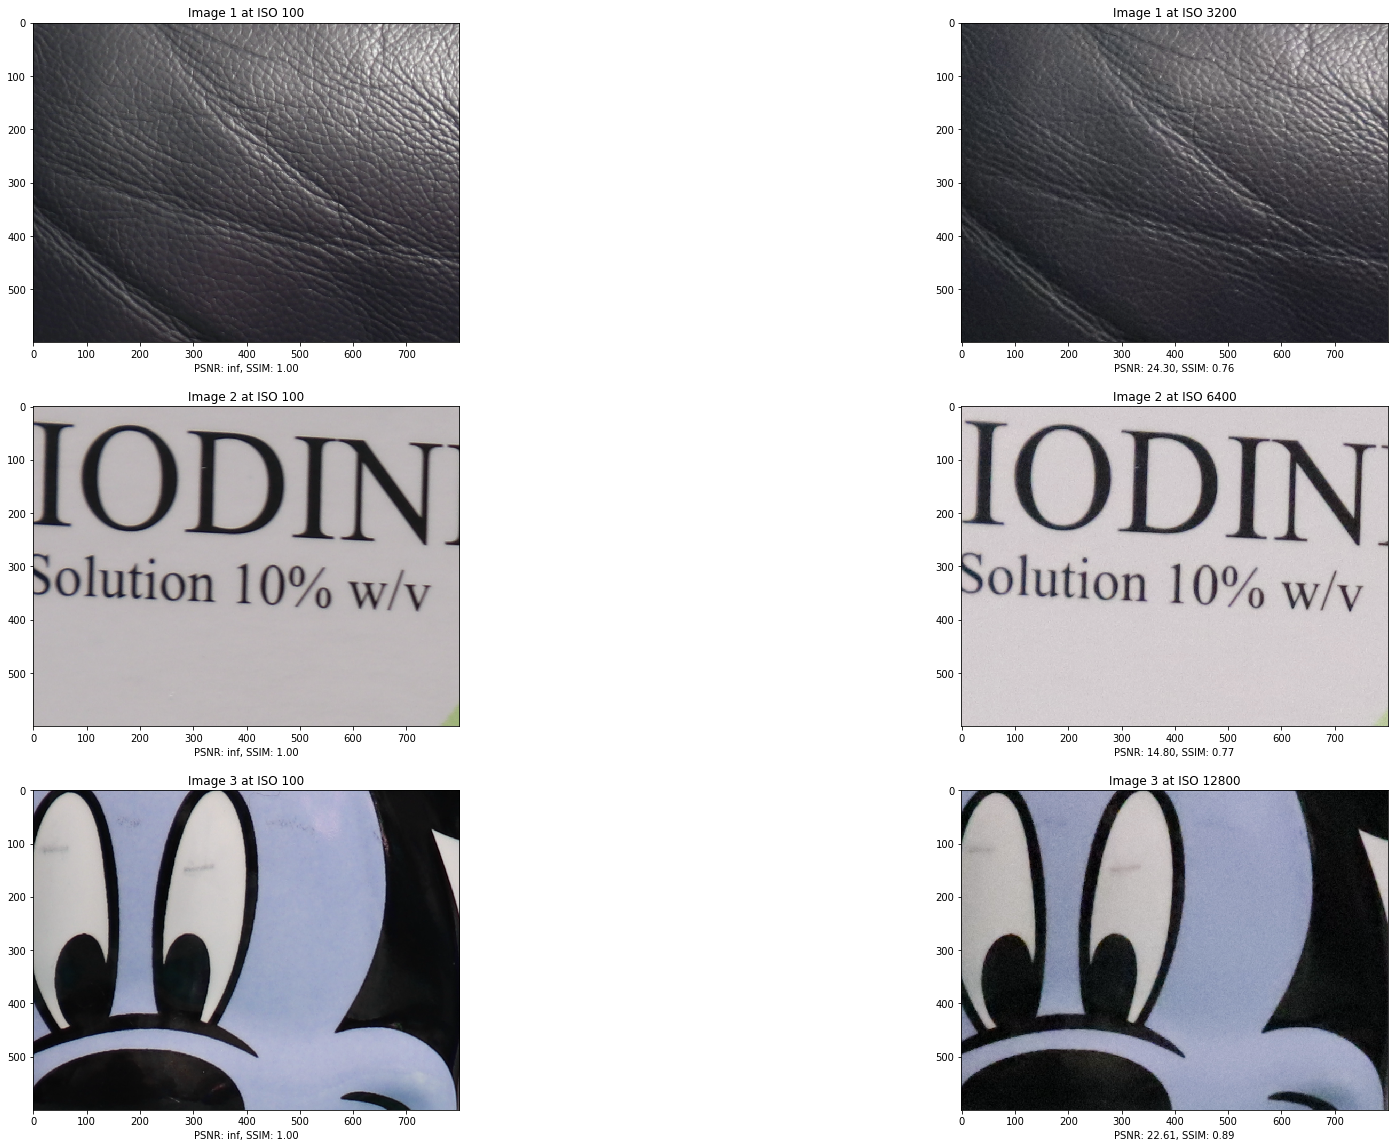

In [51]:
label = 'PSNR: {:.2f}, SSIM: {:.2f}'
fig, axs = plt.subplots(3, 2)
fig.set_size_inches(30.5, 20, forward=True)

axs[0, 0].imshow(iso_100_img1_float)
axs[0, 0].set_title('Image 1 at ISO 100')
psnr, ssim_score = get_measurement(iso_100_img1_float, iso_100_img1_float)
axs[0, 0].set_xlabel(label.format(psnr, ssim_score))

axs[0, 1].imshow(iso_3200_img1_float)
axs[0, 1].set_title('Image 1 at ISO 3200')
psnr, ssim_score = get_measurement(iso_100_img1_float, iso_3200_img1_float)
axs[0, 1].set_xlabel(label.format(psnr, ssim_score))

axs[1, 0].imshow(iso_100_img2_float)
axs[1, 0].set_title('Image 2 at ISO 100')
psnr, ssim_score = get_measurement(iso_100_img2_float, iso_100_img2_float)
axs[1, 0].set_xlabel(label.format(psnr, ssim_score))

axs[1, 1].imshow(iso_6400_img2_float)
axs[1, 1].set_title('Image 2 at ISO 6400')
psnr, ssim_score = get_measurement(iso_100_img2_float, iso_6400_img2_float)
axs[1, 1].set_xlabel(label.format(psnr, ssim_score))

axs[2, 0].imshow(iso_100_img3_float)
axs[2, 0].set_title('Image 3 at ISO 100')
psnr, ssim_score = get_measurement(iso_100_img3_float, iso_100_img3_float)
axs[2, 0].set_xlabel(label.format(psnr, ssim_score))

axs[2, 1].imshow(iso_12800_img3_float)
axs[2, 1].set_title('Image 3 at ISO 12800')
psnr, ssim_score = get_measurement(iso_100_img3_float, iso_12800_img3_float)
axs[2, 1].set_xlabel(label.format(psnr, ssim_score))

In [57]:
fig.savefig('original_img_comparison.png')

## Run Denoising Alogorithms

In [52]:
img = iso_100_img2
img_float = iso_100_img2_float
noisy = iso_6400_img2
noisy_float = iso_6400_img2_float

In [53]:
tv_chambolle, tv_chambolle_runtime = denoise_img(noisy, 'TV')
bilateral, bilateral_runtime = denoise_img(noisy, 'BI')
median, median_runtime = denoise_img(noisy, 'ME')
non_local_means, non_local_means_median_runtime = denoise_img(noisy, 'NO')
wavelet, wavelet_runtime = denoise_img(noisy, 'WA')
wavelet_bayes, wavelet_bayes_runtime = denoise_img(noisy, 'WB')
wavelet_visu, wavelet_visu_runtime = denoise_img(noisy, 'WV')

Text(0.5, 0, 'PSNR: 14.86, SSIM: 0.79')

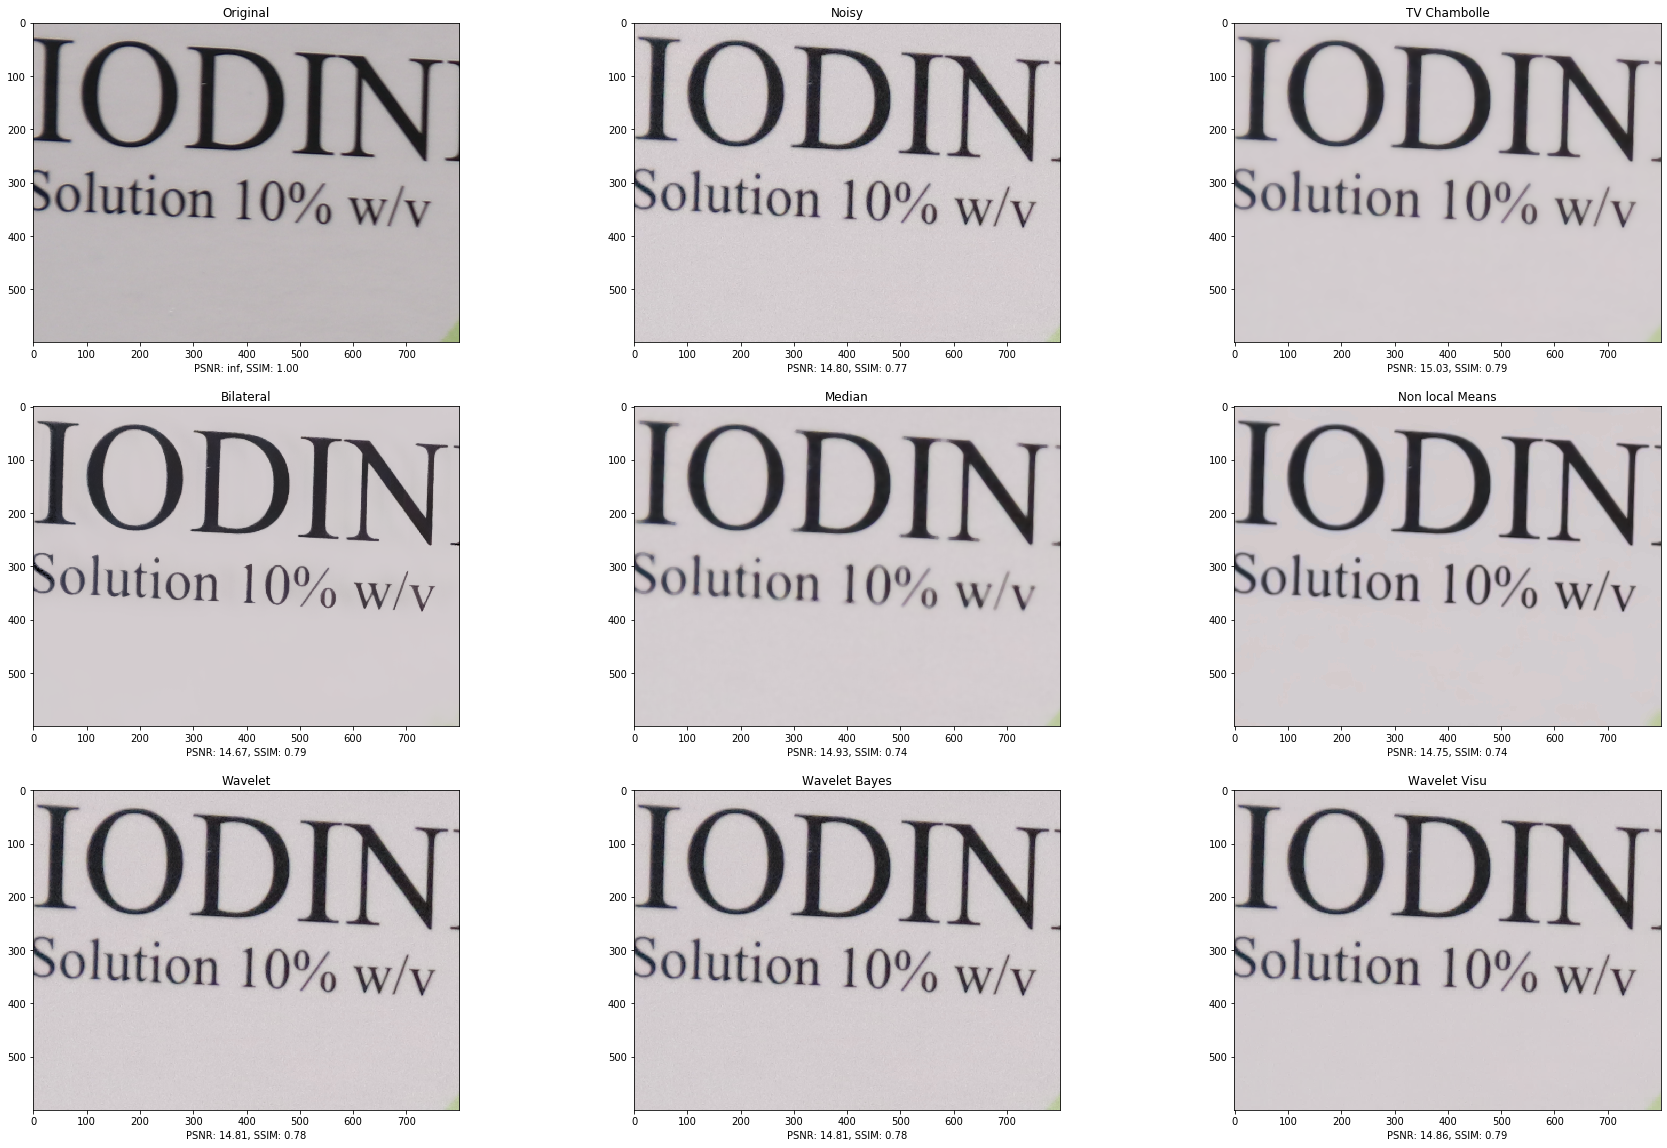

In [54]:
label = 'PSNR: {:.2f}, SSIM: {:.2f}'
fig_result, axs = plt.subplots(3, 3)
fig_result.set_size_inches(30.5, 20, forward=True)

axs[0, 0].imshow(img_float)
axs[0, 0].set_title('Original')
psnr, ssim_score = get_measurement(img_float, img_float)
axs[0, 0].set_xlabel(label.format(psnr, ssim_score))

axs[0, 1].imshow(noisy)
axs[0, 1].set_title('Noisy')
noisy_psnr, noisy_ssim_score = get_measurement(img_float, noisy_float)
axs[0, 1].set_xlabel(label.format(noisy_psnr, noisy_ssim_score))

axs[0, 2].imshow(tv_chambolle)
axs[0, 2].set_title('TV Chambolle')
tv_psnr, tv_ssim_score = get_measurement(img_float, img_as_float(tv_chambolle, False))
tv_psnr_enhance, tv_ssim_score_enhance, tv_enhance_index, tv_time_efficiency = showEnhancementIndex('TV', noisy_psnr, noisy_ssim_score, tv_psnr, tv_ssim_score, tv_chambolle_runtime)
axs[0, 2].set_xlabel(label.format(tv_psnr, tv_ssim_score))

axs[1, 0].imshow(bilateral)
axs[1, 0].set_title('Bilateral')
bi_psnr, bi_ssim_score = get_measurement(img_float, img_as_float(bilateral, False))
bi_psnr_enhance, bi_ssim_score_enhance, bi_enhance_index, bi_time_efficiency = showEnhancementIndex('Bilateral', noisy_psnr, noisy_ssim_score, bi_psnr, bi_ssim_score, bilateral_runtime)
axs[1, 0].set_xlabel(label.format(bi_psnr, bi_ssim_score))

axs[1, 1].imshow(median)
axs[1, 1].set_title('Median')
me_psnr, me_ssim_score = get_measurement(img, median)
me_psnr_enhance, me_ssim_score_enhance, me_enhance_index, me_time_efficiency= showEnhancementIndex('Median', noisy_psnr, noisy_ssim_score, me_psnr, me_ssim_score, median_runtime)
axs[1, 1].set_xlabel(label.format(me_psnr, me_ssim_score))

axs[1, 2].imshow(non_local_means)
axs[1, 2].set_title('Non local Means')
no_psnr, no_ssim_score = get_measurement(img, non_local_means)
no_psnr_enhance, no_ssim_score_enhance, no_enhance_index, no_time_efficiency = showEnhancementIndex('Non local Means', noisy_psnr, noisy_ssim_score, no_psnr, no_ssim_score, non_local_means_median_runtime)
axs[1, 2].set_xlabel(label.format(no_psnr, no_ssim_score))

axs[2, 0].imshow((wavelet * 255).astype(np.uint8))
axs[2, 0].set_title('Wavelet')
wa_psnr, wa_ssim_score = get_measurement(img_float, img_as_float(wavelet, False))
wa_psnr_enhance, wa_ssim_score_enhance, wa_enhance_index, wa_time_efficiency = showEnhancementIndex('Wavelet', noisy_psnr, noisy_ssim_score, wa_psnr, wa_ssim_score, wavelet_runtime)
axs[2, 0].set_xlabel(label.format(wa_psnr, wa_ssim_score))

axs[2, 1].imshow((wavelet_bayes * 255).astype(np.uint8))
axs[2, 1].set_title('Wavelet Bayes')
wb_psnr, wb_ssim_score = get_measurement(img_float, img_as_float(wavelet_bayes, False))
wb_psnr_enhance, wb_ssim_score_enhance, wb_enhance_index, wb_time_efficiency = showEnhancementIndex('Wavelet Bayes', noisy_psnr, noisy_ssim_score, wb_psnr, wb_ssim_score, wavelet_bayes_runtime)
axs[2, 1].set_xlabel(label.format(wb_psnr, wb_ssim_score))

axs[2, 2].imshow((wavelet_visu * 255).astype(np.uint8))
axs[2, 2].set_title('Wavelet Visu')
wv_psnr, wv_ssim_score = get_measurement(img_float, img_as_float(wavelet_visu, False))
wv_psnr_enhance, wv_ssim_score_enhance, wv_enhance_index, wv_time_efficiency = showEnhancementIndex('Wavelet Visu', noisy_psnr, noisy_ssim_score, wv_psnr, wv_ssim_score, wavelet_visu_runtime)
axs[2, 2].set_xlabel(label.format(wv_psnr, wv_ssim_score))

In [55]:
result = [['TV', tv_psnr, tv_ssim_score, tv_chambolle_runtime, tv_psnr_enhance, tv_ssim_score_enhance, tv_enhance_index, tv_time_efficiency],
        ['BI', bi_psnr, bi_ssim_score, bilateral_runtime, bi_psnr_enhance, bi_ssim_score_enhance, bi_enhance_index, bi_time_efficiency], 
        ['ME', me_psnr, me_ssim_score, median_runtime, me_psnr_enhance, me_ssim_score_enhance, me_enhance_index, me_time_efficiency], 
        ['NO', no_psnr, no_ssim_score, non_local_means_median_runtime, no_psnr_enhance, no_ssim_score_enhance, no_enhance_index, no_time_efficiency], 
        ['WA', wa_psnr, wa_ssim_score, wavelet_runtime, wa_psnr_enhance, wa_ssim_score_enhance, wa_enhance_index, wa_time_efficiency], 
        ['WB', wb_psnr, wb_ssim_score, wavelet_bayes_runtime, wb_psnr_enhance, wb_ssim_score_enhance, wb_enhance_index, wb_time_efficiency], 
        ['WV', wv_psnr, wv_ssim_score, wavelet_visu_runtime, wv_psnr_enhance, wv_ssim_score_enhance, wv_enhance_index, wv_time_efficiency]
       ]
pd.DataFrame(result, columns=['Filter', 'PSNR', 'SSIM', 'Denoising Duration', 'PSNR Enhancement', 'SSIM Enhancement', 'Enhancement index', 'Time Efficiency'])

,Filter,PSNR,SSIM,Denoising Duration,PSNR Enhancement,SSIM Enhancement,Enhancement index,Time Efficiency
0,TV,15.03,0.79,2.91,1.55%,2.60%,4.15%,1.43%
1,BI,14.67,0.79,81.57,-0.88%,2.60%,1.72%,0.02%
2,ME,14.93,0.74,0.04,0.88%,-3.90%,-3.02%,-75.44%
3,NO,14.75,0.74,0.66,-0.34%,-3.90%,-4.23%,-6.42%
4,WA,14.81,0.78,0.07,0.07%,1.30%,1.37%,19.52%
5,WB,14.81,0.78,0.07,0.07%,1.30%,1.37%,19.52%
6,WV,14.86,0.79,0.09,0.41%,2.60%,3.00%,33.36%


## Save The Figure

In [56]:
fig_result.savefig('img2_denoised_result.png')